In [1]:
from greedy_mcmc_attack import *

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# dataset_directory = "../Cora"
cora_dataset = Planetoid(root='', name='Cora')
data = cora_dataset[0].to(device)
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [4]:
# model = GCN(data.x.shape[1], cora_dataset.num_classes, [16]).to(device)

In [5]:
# model.reset_parameters()
# train = Trainable(model)
# train.fit(data, 200)

In [6]:
# # Get initial accuracy
# initial_loss, initial_accuracy = train.test(data)
# print(f"Initial Accuracy: {initial_accuracy}")
# print(f"Initial Loss: {initial_loss}")

In [7]:
edges_to_add = None

In [8]:
model_save_path = "multi_metattack_gcn_model.pth"
list_save_path = "multi_metattack_edges_list.pth"

In [9]:
# # save model
# torch.save(model.state_dict(), model_save_path)

# # save edges
# torch.save(edges_to_add, list_save_path)

In [10]:
model, edges_to_add, train = load_model_and_edges(model_save_path, list_save_path, data.x.shape[1], cora_dataset.num_classes, [16], device)

In [11]:
# Get initial accuracy
initial_loss, initial_accuracy = train.test(data)
print(f"Initial Accuracy: {initial_accuracy}")
print(f"Initial Loss: {initial_loss}")

Initial Accuracy: 0.749
Initial Loss: 1.8118197917938232


In [12]:
G, initial_edge_count, ptb_rate, budget = initialize(data, _ptb_rate=0.15)

In [13]:
splits = [0.0, 0.5, 0.7, 0.9]
split_dic_acc = defaultdict(list)
split_dic_loss = defaultdict(list)

In [14]:
for s in splits:
    print(s)
    split_dic_acc[s], split_dic_loss[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, constant_fn, device, verbose=True)

0.0


Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

0.5


Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0001659393310546875
Attempt: 14, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: -0.0004926919937133789, master_dirty_delta: 0.0017753839492797852
Attempt: 15, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: 0.000240325927734375, master_dirty_delta: 0.006039738655090332
Attempt: 16, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: 0.0016679763793945312, master_dirty_delta: 0.00674128532409668
Attempt: 27, Selected: 20
max_change: 0.01811819791793823, master_clean_delta: 0.00604403018951416, master_dirty_delta: 0.015290260314941406
Attempt: 28, Selected: 20
max_change: 0.01811819791793823, master_clean_delta: 0.005184173583984375, master_dirty_delta: 0.01479947566986084
Attempt: 29, Selected: 20
max_change: 0.01811819791793823, master_clean_delta: 0.006293535232543945, master_dirty_delta: 0.015908479690551758
Atte

Peturbing graph...:   0%|          | 0/204 [00:00<?, ?it/s]

0.7


Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.018118199110031128, master_clean_delta: 0.0, master_dirty_delta: 0.00016617774963378906
Attempt: 17, Selected: 10
max_change: 0.018118199110031128, master_clean_delta: 0.0018641948699951172, master_dirty_delta: 0.001995563507080078
Attempt: 31, Selected: 20
max_change: 0.018118199110031128, master_clean_delta: 0.014792084693908691, master_dirty_delta: 0.01798248291015625
Attempt: 45, Selected: 30
max_change: 0.018118199110031128, master_clean_delta: 0.015053987503051758, master_dirty_delta: 0.02137923240661621
Attempt: 46, Selected: 30
max_change: 0.018118199110031128, master_clean_delta: 0.015777587890625, master_dirty_delta: 0.021591663360595703
Attempt: 62, Selected: 40
max_change: 0.018118199110031128, master_clean_delta: 0.012268424034118652, master_dirty_delta: 0.02416825294494629
Attempt: 77, Selected: 50
max_change: 0.018118199110031128, master_clean_delta: 0.016771793365478516, master_dirty_delta: 0.02714991569519043
Attempt: 90, Selected:

Peturbing graph...:   0%|          | 0/124 [00:00<?, ?it/s]

0.9


Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.00029790401458740234
Attempt: 16, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: 0.0021648406982421875, master_dirty_delta: 0.004232645034790039
Attempt: 31, Selected: 20
max_change: 0.01811819791793823, master_clean_delta: 0.013883113861083984, master_dirty_delta: 0.017385005950927734
Attempt: 45, Selected: 30
max_change: 0.01811819791793823, master_clean_delta: 0.01265263557434082, master_dirty_delta: 0.018511176109313965
Attempt: 63, Selected: 40
max_change: 0.01811819791793823, master_clean_delta: 0.016925573348999023, master_dirty_delta: 0.023209571838378906
Attempt: 64, Selected: 40
max_change: 0.01811819791793823, master_clean_delta: 0.016974449157714844, master_dirty_delta: 0.02329540252685547
Attempt: 84, Selected: 50
max_change: 0.01811819791793823, master_clean_delta: 0.01585400104522705, master_dirty_delta: 0.02515709400177002
Attempt

Peturbing graph...:   0%|          | 0/42 [00:00<?, ?it/s]

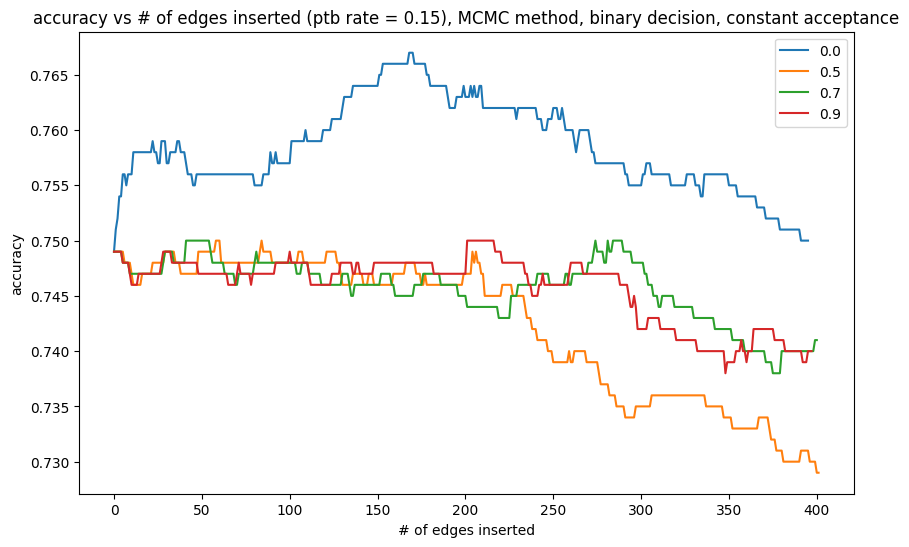

In [15]:
plot_results(split_dic_acc, ptb_rate, "MCMC", "binary", "constant", "accuracy")

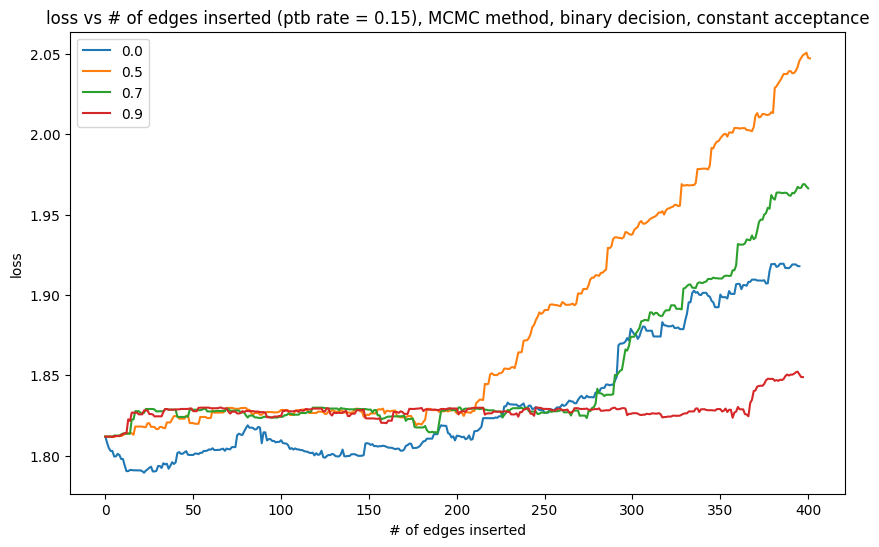

In [16]:
plot_results(split_dic_loss, ptb_rate, "MCMC", "binary", "constant", "loss")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [17]:
split_dic_decreasing_acc = defaultdict(list)
split_dic_decreasing_loss = defaultdict(list)

In [18]:
for s in splits:
    split_dic_decreasing_acc[s], split_dic_decreasing_loss[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, increasing_fn, device, verbose=True)

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0001659393310546875
Attempt: 17, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: -0.0003014802932739258, master_dirty_delta: 0.0014635324478149414
Attempt: 18, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: 0.0011260509490966797, master_dirty_delta: 0.002668142318725586
Attempt: 19, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: 0.0004451274871826172, master_dirty_delta: 0.0014907121658325195
Attempt: 34, Selected: 20
Attempt: 35, Selected: 20
max_change: 0.01811819791793823, master_clean_delta: 5.125999450683594e-05, master_dirty_delta: 0.005272984504699707
Attempt: 51, Selected: 30
max_change: 0.01811819791793823, master_clean_delta: 0.002445816993713379, master_dirty_delta: 0.007063865661621094
Attempt: 66, Selected: 40
max_change: 0.01811819791793823, master_clean_delta: -0.0020717382431030273, master_dirt

Peturbing graph...:   0%|          | 0/204 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: -6.4373016357421875e-06
Attempt: 1, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -0.001565098762512207, master_dirty_delta: 0.0032396316528320312
Attempt: 2, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 0.0, master_dirty_delta: 2.384185791015625e-07
Attempt: 23, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: 6.091594696044922e-05, master_dirty_delta: 0.002298593521118164
Attempt: 42, Selected: 20
max_change: 0.01811819791793823, master_clean_delta: -0.0009162425994873047, master_dirty_delta: 0.0038219690322875977
Attempt: 56, Selected: 30
max_change: 0.01811819791793823, master_clean_delta: 0.00484466552734375, master_dirty_delta: 0.010884284973144531
Attempt: 57, Selected: 30
max_change: 0.01811819791793823, master_clean_delta: 0.003296971321105957, master_dirty_delta: 0.007123708724975586
Attempt: 58, Selec

Peturbing graph...:   0%|          | 0/124 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 0.0, master_dirty_delta: -0.0008176565170288086
Attempt: 1, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -0.0015652179718017578, master_dirty_delta: -0.0021935701370239258
Attempt: 2, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 0.0, master_dirty_delta: 2.384185791015625e-07
Attempt: 22, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: 0.005189418792724609, master_dirty_delta: 0.005202770233154297
Attempt: 23, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: 4.3511390686035156e-05, master_dirty_delta: 0.0012933015823364258
Attempt: 49, Selected: 20
max_change: 0.01811819791793823, master_clean_delta: 0.003674149513244629, master_dirty_delta: 0.0034995079040527344
Attempt: 50, Selected: 20
max_change: 0.01811819791793823, master_clean_delta: 9.906291961669922e-05, master_dirty_delta: 0.0014435052871704102
Attempt: 67, Selected: 30
max_cha

Peturbing graph...:   0%|          | 0/42 [00:00<?, ?it/s]

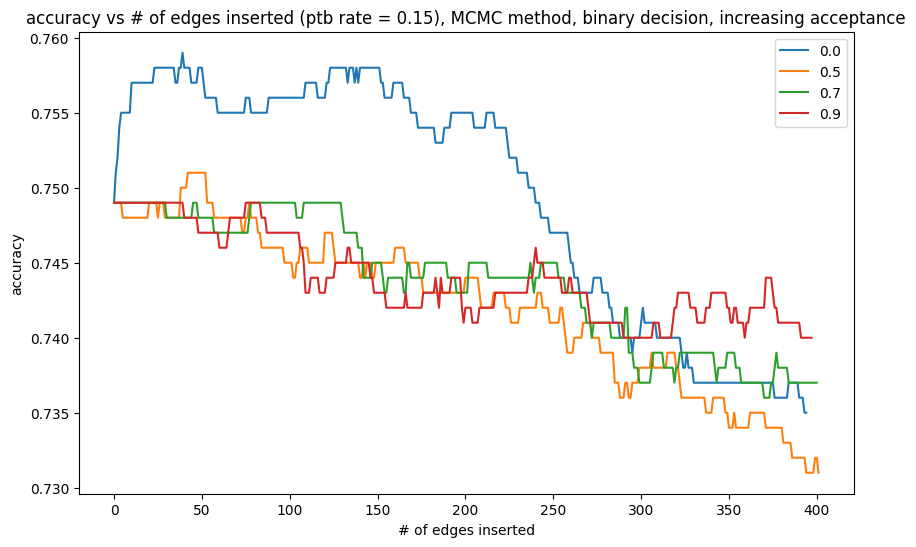

In [19]:
plot_results(split_dic_decreasing_acc, ptb_rate, "MCMC", "binary", "increasing", "accuracy")

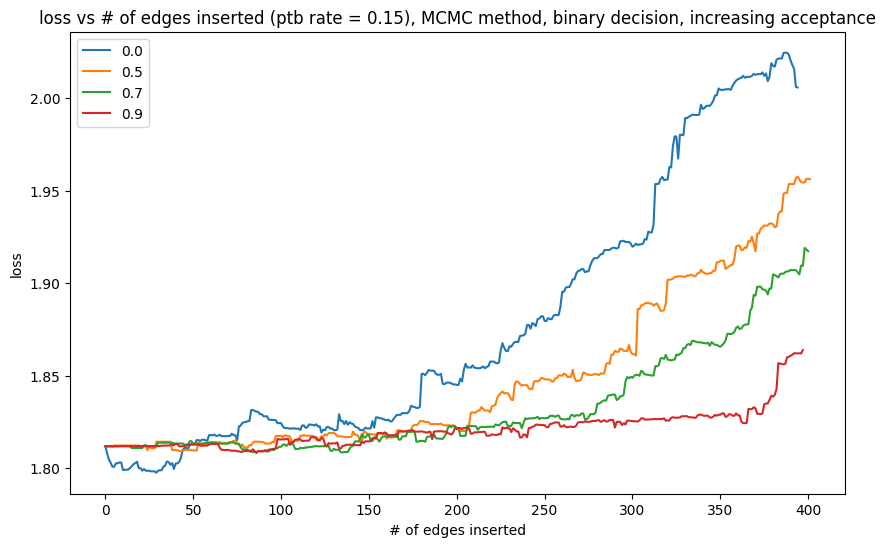

In [20]:
plot_results(split_dic_decreasing_loss, ptb_rate, "MCMC", "binary", "increasing", "loss")

In [21]:
split_dic_decreasing_constant_acc = defaultdict(list)
split_dic_decreasing_constant_loss = defaultdict(list)

In [22]:
for s in splits:
    split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, constant_fn, device, verbose=True)

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0001633167266845703
Attempt: 19, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: 0.0014988183975219727, master_dirty_delta: 0.003994107246398926
Attempt: 46, Selected: 20
max_change: 0.01811819791793823, master_clean_delta: 0.016044020652770996, master_dirty_delta: 0.024416089057922363
Attempt: 47, Selected: 20
max_change: 0.01811819791793823, master_clean_delta: 0.019618988037109375, master_dirty_delta: 0.028530120849609375
Attempt: 48, Selected: 20
max_change: 0.01811819791793823, master_clean_delta: 0.016044020652770996, master_dirty_delta: 0.025265216827392578
Attempt: 77, Selected: 30
max_change: 0.01811819791793823, master_clean_delta: 0.013245344161987305, master_dirty_delta: 0.03805339336395264
Attempt: 100, Selected: 40
max_change: 0.01811819791793823, master_clean_delta: 0.01609969139099121, master_dirty_delta: 0.043952345848083496
Attem

Peturbing graph...:   0%|          | 0/205 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: -0.0012067556381225586
Attempt: 1, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -0.0015652179718017578, master_dirty_delta: -0.0015004873275756836
Attempt: 2, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: -0.0003205537796020508
Attempt: 3, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -0.0010582208633422852, master_dirty_delta: -0.0010404586791992188
Attempt: 4, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -2.47955322265625e-05, master_dirty_delta: -0.0006239414215087891
Attempt: 5, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0
Attempt: 6, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: -0.00011098384857177734
Attempt: 7,

Peturbing graph...:   0%|          | 0/124 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 0.0, master_dirty_delta: 0.0
Attempt: 21, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: 0.009735107421875, master_dirty_delta: 0.010718822479248047
Attempt: 37, Selected: 20
max_change: 0.01811819791793823, master_clean_delta: 0.017295002937316895, master_dirty_delta: 0.017962932586669922
Attempt: 76, Selected: 30
max_change: 0.01811819791793823, master_clean_delta: 0.017563939094543457, master_dirty_delta: 0.0184171199798584
Attempt: 100, Selected: 40
max_change: 0.01811819791793823, master_clean_delta: 0.01789569854736328, master_dirty_delta: 0.02069711685180664
Attempt: 101, Selected: 40
max_change: 0.01811819791793823, master_clean_delta: 0.017995119094848633, master_dirty_delta: 0.020728230476379395
Attempt: 156, Selected: 50
max_change: 0.01811819791793823, master_clean_delta: 0.01779472827911377, master_dirty_delta: 0.02442753314971924
Attempt: 157, Selected: 50
max_change: 0.0181181

Peturbing graph...:   0%|          | 0/42 [00:00<?, ?it/s]

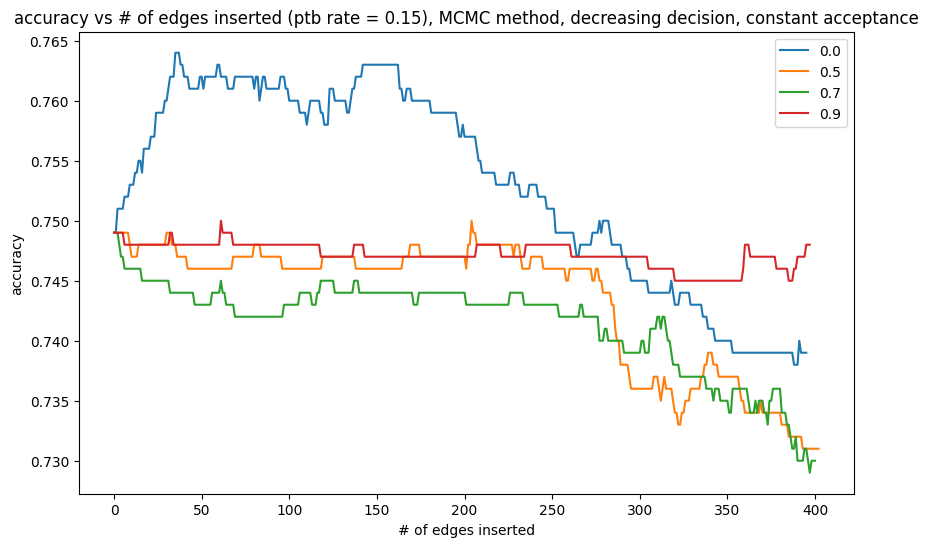

In [23]:
plot_results(split_dic_decreasing_constant_acc, ptb_rate, "MCMC", "decreasing", "constant", "accuracy")

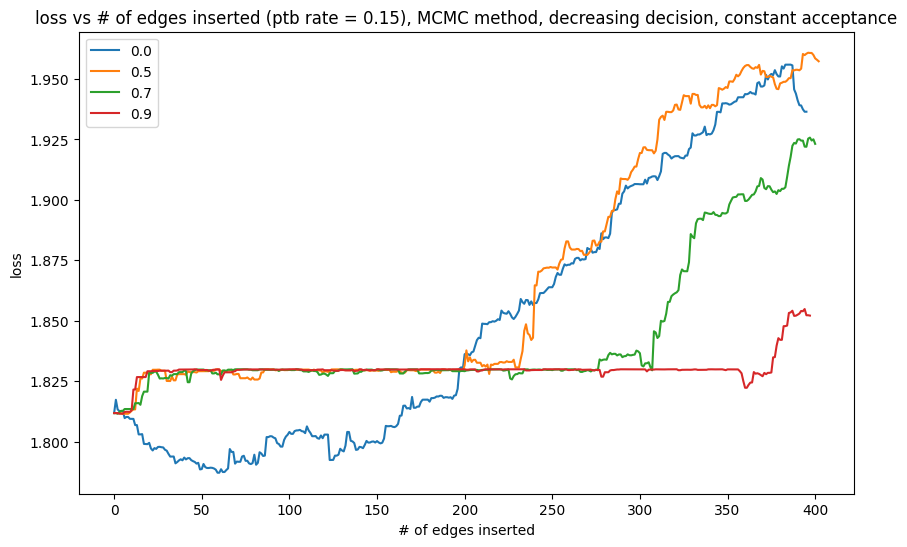

In [24]:
plot_results(split_dic_decreasing_constant_loss, ptb_rate, "MCMC", "decreasing", "constant", "loss")

In [25]:
split_dic_decreasing_gradual_acc = defaultdict(list)
split_dic_decreasing_gradual_loss = defaultdict(list)

In [26]:
for s in splits:
    split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, increasing_fn, device, verbose=True)

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 2.2292137145996094e-05
Attempt: 14, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: 0.0008931159973144531, master_dirty_delta: 0.010197758674621582
Attempt: 15, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: 0.0003510713577270508, master_dirty_delta: 0.010655641555786133
Attempt: 44, Selected: 20
max_change: 0.01811819791793823, master_clean_delta: 0.0011047124862670898, master_dirty_delta: 0.01741647720336914
Attempt: 45, Selected: 20
max_change: 0.01811819791793823, master_clean_delta: 0.0011025667190551758, master_dirty_delta: 0.016939282417297363
Attempt: 46, Selected: 20
max_change: 0.01811819791793823, master_clean_delta: 0.004017829895019531, master_dirty_delta: 0.017898201942443848
Attempt: 47, Selected: 20
max_change: 0.01811819791793823, master_clean_delta: 0.002470254898071289, master_dirty_delta: 0.017947793006896973
A

Peturbing graph...:   0%|          | 0/205 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: -0.001465916633605957
Attempt: 1, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -0.001565098762512207, master_dirty_delta: -0.0001571178436279297
Attempt: 2, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.00021660327911376953
Attempt: 26, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: -5.2094459533691406e-05, master_dirty_delta: 0.016861557960510254
Attempt: 27, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: -5.042552947998047e-05, master_dirty_delta: 0.015731096267700195
Attempt: 28, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: -5.8770179748535156e-05, master_dirty_delta: 0.01684856414794922
Attempt: 29, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: -5.161762237548828e-05, master_dirty_delta: 0.016861796379

Peturbing graph...:   0%|          | 0/124 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0
Attempt: 1, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -0.0015652179718017578, master_dirty_delta: -0.0014513731002807617
Attempt: 2, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0
Attempt: 3, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -0.001058340072631836, master_dirty_delta: -0.0010582208633422852
Attempt: 4, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -2.47955322265625e-05, master_dirty_delta: -2.86102294921875e-05
Attempt: 5, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 0.0, master_dirty_delta: 1.1920928955078125e-07
Attempt: 28, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: -0.0033208131790161133, master_dirty_delta: -0.002752542495727539
Attempt: 29, Selected: 10
max_change: 0.01811819791

Peturbing graph...:   0%|          | 0/42 [00:00<?, ?it/s]

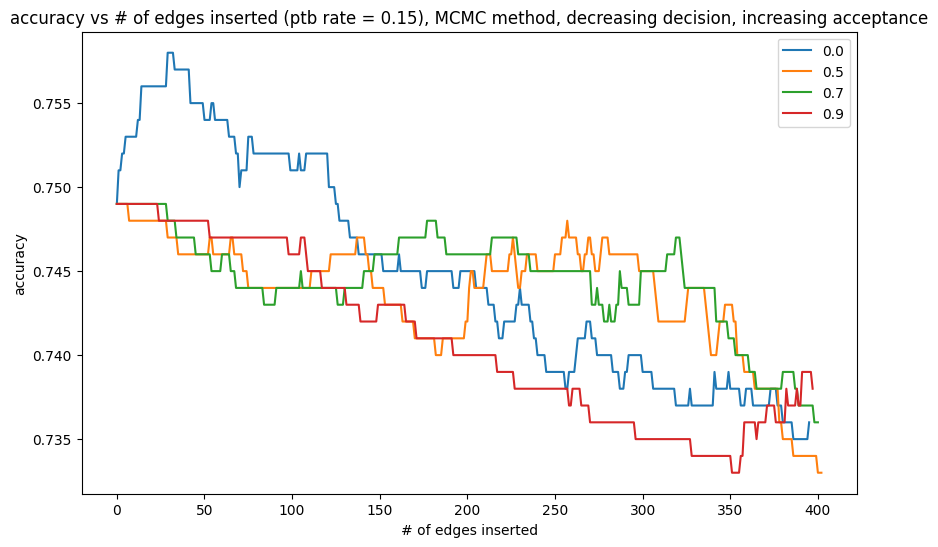

In [27]:
plot_results(split_dic_decreasing_gradual_acc, ptb_rate, "MCMC", "decreasing", "increasing", "accuracy")

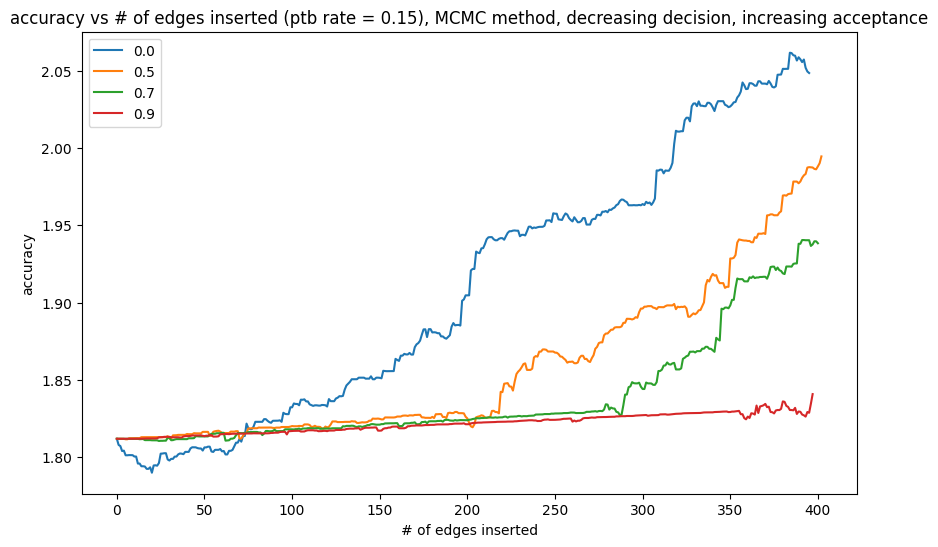

In [28]:
plot_results(split_dic_decreasing_gradual_loss, ptb_rate, "MCMC", "decreasing", "increasing", "accuracy")